In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

In [2]:
def load_data_from_file(fileName = "/content/advertising.csv"):
    data = np.genfromtxt(fileName, dtype = None, delimiter = ",", skip_header = 1)
    features_X = data[:, :3]
    features_X = np.hstack((np.ones([len(data), 1]), features_X))
    sales_Y = data[:, 3]
    return features_X , sales_Y

In [3]:
# Question 2:
features_X , sales_Y = load_data_from_file()
print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [4]:
# Question 3:
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [5]:
def create_individual(n = 4, bound = 10):
    individual = [(np.random.random() * 2 - 1) * (bound / 2) for _ in range(n)]
    return individual

individual = create_individual()
print(individual)

[-2.1355021023207064, -1.100821659274932, -1.9395771993173794, 4.829878146411013]


In [6]:
features_X , sales_Y = load_data_from_file()

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 0
    fitness_value = 1 / (loss + 1)
    return fitness_value

In [7]:
# Question 4:
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [8]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    for i in range(len(individual1)):
        if np.random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
    return individual1_new, individual2_new

In [9]:
# Question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [10]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    for i in range(len(individual_m)):
        if np.random.random() < mutation_rate:
            individual_m[i] = np.random.random()

    return individual_m

In [11]:
# Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [12]:
def initializePopulation(m):
    population = [create_individual() for _ in range(m)]
    return population

def selection(sorted_old_population, m = 100):
    index1 = random.randint(0, m - 1)
    while True:
        index2 = random.randint(0, m - 1)
        if index2 != index1:
            break
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    return individual_s

In [13]:
def create_new_population(old_population, elitism = 2, gen = 1):
    m = len(old_population)
    sorted_population = sorted(old_population, key = compute_fitness)
    if gen%1 == 0:
        print("Best loss: ", compute_loss(sorted_population[m - 1]) , " with chromsome:", sorted_population[m - 1])

    new_population = []
    while len(new_population) < m - elitism:
        # Selection
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m)

        # Crossover
        individual_crs1, individual_crs2 = crossover(individual_s1, individual_s2)

        # Mutation
        individual_m1 = mutate(individual_crs1)
        individual_m2 = mutate(individual_crs2)

        new_population.append(individual_m1)
        new_population.append(individual_m2)

    # Copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m - elitism:]:
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m - 1])

In [14]:
# Question 7:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism = 2, gen = 1)

Best loss:  123415.051528805  with chromsome: [3.44, 2.57, -0.79, -2.41]


In [15]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initializePopulation(m)
    losses_list = []
    for i in range(n_generations):
        new_population, loss = create_new_population(population)
        population = new_population
        losses_list.append(loss)
    return losses_list, population

Best loss:  832.3984744293193  with chromsome: [-4.23806993333658, 0.3327286365978499, -0.8196593887984671, -0.34563123995865475]
Best loss:  829.2719847324718  with chromsome: [2.498078865131619, 0.24506297228492624, -0.28329971802928955, -0.8976460096888761]
Best loss:  169.43572400799465  with chromsome: [0.0556191024541941, 0.04545424641586837, 0.8731145831940834, -0.4905356909617997]
Best loss:  169.43572400799465  with chromsome: [0.0556191024541941, 0.04545424641586837, 0.8731145831940834, -0.4905356909617997]
Best loss:  169.43572400799465  with chromsome: [0.0556191024541941, 0.04545424641586837, 0.8731145831940834, -0.4905356909617997]
Best loss:  169.43572400799465  with chromsome: [0.0556191024541941, 0.04545424641586837, 0.8731145831940834, -0.4905356909617997]
Best loss:  74.31536781120315  with chromsome: [0.572063150351978, 0.061691666396239686, -0.28329971802928955, 0.39212038839032426]
Best loss:  74.31536781120315  with chromsome: [0.572063150351978, 0.06169166639623

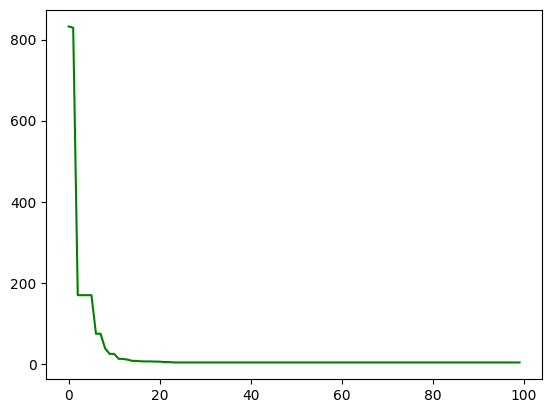

In [16]:
# Visualization
def visualize_loss(losses_list):
    plt.plot(losses_list, color = "g")
    plt.show()

losses_list, population = run_GA()
visualize_loss(losses_list)

[2.498078865131619, 0.06023162680724725, 0.12982752864609426, 0.014766913782774949]


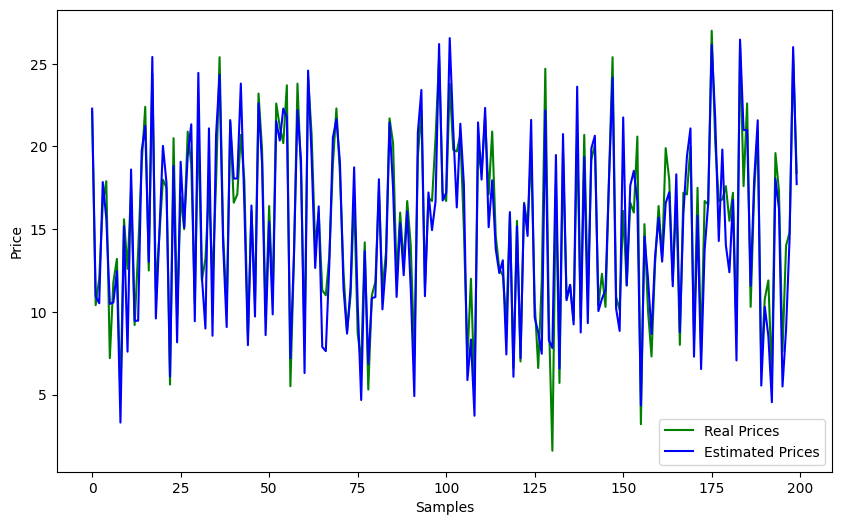

In [18]:
def visualize_predict_gt(population):
    # visualization of ground truth and predict value
    sorted_population = sorted(population, key= compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])
    estimated_prices = []
    for feature in features_X:
        estimated_prices.append(feature.dot(theta))
    fig, ax = plt.subplots(figsize = (10, 6))
    plt.xlabel("Samples")
    plt.ylabel("Price")
    plt.plot(sales_Y, c = "green", label = "Real Prices")
    plt.plot(estimated_prices , c = "blue", label = "Estimated Prices")
    plt.legend()
    plt.show()

visualize_predict_gt(population)